## Exploratory Data Analysis of credit data

### Explore the credit data

Looking at the data set cr_loan. In this data set, loan_status shows whether the loan is currently in default with __1 being default__ and __0 being non-default__.

Checking the structure of the data as well as seeing a snapshot helps us better understand what's inside the set. Similarly, visualizations provide a high level view of the data in addition to important trends and patterns.

In [3]:
import pandas as pd

In [4]:
cr_loan = pd.read_csv(r'cr_loan2.csv')

In [5]:
cr_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [6]:
cr_loan.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [7]:
import matplotlib.pyplot as plt

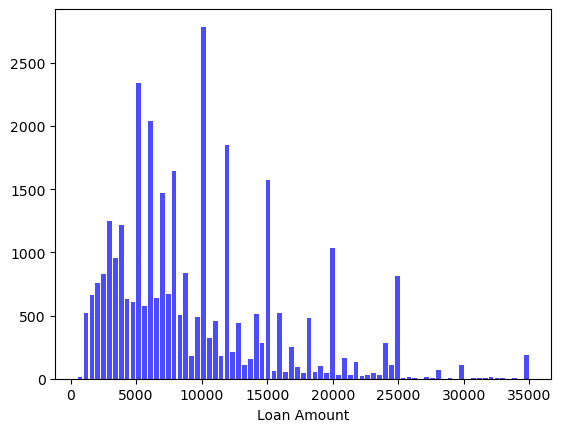

In [8]:
plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.8)
plt.xlabel("Loan Amount")
plt.show()

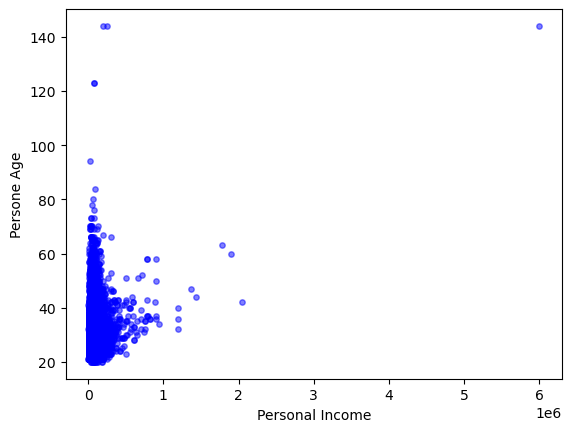

In [9]:
# Plot a scatter plot of income against age
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],s=15,c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

In [10]:
cr_loan.describe(percentiles=[0.1, 0.5, 0.9])

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
10%,22.000000,2.859000e+04,0.000000,3000.000000,6.910000,0.000000,0.050000,2.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
90%,36.000000,1.100040e+05,10.000000,19000.000000,15.298000,1.000000,0.320000,11.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


__loan_percent_income:__

10% = 0.05:

This means that 10% of the data points in the dataset are less than or equal to 0.05. In other words, __if you were to rank all the values in ascending order, the first 10% of those values would be below 0.05.__

50% = 0.15:

This indicates that 50% of the data points are less than or equal to 0.15. The 50th percentile is also known as the __median__, so this means that half of the values in your dataset fall below 0.15, and half are above it.

90% = 0.32:

This signifies that 90% of the data points are less than or equal to 0.32. Thus, __only 10% of the values are greater than 0.32__. This indicates that a significant majority of your dataset has values below this threshold.

In [12]:
# Count unique values in the "person_home_ownership" column
unique_counts = cr_loan['person_home_ownership'].value_counts()
unique_counts

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

In [13]:
# Count unique values in the "loan_intent" column
unique_counts2 = cr_loan['loan_intent'].value_counts()
unique_counts2

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [14]:
#checking median age by loan intent
df_loan_intent_age = cr_loan.groupby(['loan_intent'])['person_age'].median().reset_index()
df_loan_intent_age

,loan_intent,person_age
0,DEBTCONSOLIDATION,26.0
1,EDUCATION,24.0
2,HOMEIMPROVEMENT,27.0
3,MEDICAL,26.0
4,PERSONAL,26.0
5,VENTURE,26.0


In [15]:
#checking max income by loan intent and status
df_loan_intent_income = cr_loan.groupby(['loan_intent','loan_status'])['person_income'].max().reset_index()
df_loan_intent_income

,loan_intent,loan_status,person_income
0,DEBTCONSOLIDATION,0,1440000
1,DEBTCONSOLIDATION,1,468000
2,EDUCATION,0,1782000
3,EDUCATION,1,263000
4,HOMEIMPROVEMENT,0,828000
5,HOMEIMPROVEMENT,1,338000
6,MEDICAL,0,1200000
7,MEDICAL,1,703800
8,PERSONAL,0,6000000
9,PERSONAL,1,648000


In [16]:
#loan_intent vs loan_status
df_loan_intent = cr_loan.groupby(['loan_intent','loan_status'])['person_income'].mean().reset_index()
df_loan_intent

,loan_intent,loan_status,person_income
0,DEBTCONSOLIDATION,0,71588.914293
1,DEBTCONSOLIDATION,1,53686.085906
2,EDUCATION,0,67745.394796
3,EDUCATION,1,46776.364536
4,HOMEIMPROVEMENT,0,82085.335210
5,HOMEIMPROVEMENT,1,49384.174283
6,MEDICAL,0,65422.364494
7,MEDICAL,1,50497.152375
8,PERSONAL,0,73055.192177
9,PERSONAL,1,46953.377960


In [17]:
#long view to wide view
pivoted_df = df_loan_intent.pivot(index='loan_intent', columns='loan_status', values='person_income')
pivoted_df

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,71588.914293,53686.085906
EDUCATION,67745.394796,46776.364536
HOMEIMPROVEMENT,82085.335210,49384.174283
MEDICAL,65422.364494,50497.152375
PERSONAL,73055.192177,46953.377960
VENTURE,70263.073481,44088.696576


#### Finding top 3 loan interest rate in ALL section of loan intent

In [19]:
df_rank = cr_loan[['loan_intent', 'loan_int_rate']].copy()
df_rank['rank'] = df_rank.groupby('loan_intent')['loan_int_rate'].rank(method = 'dense', ascending = False)
df_rank.sort_values(by = 'rank', ascending = True).head()

,loan_intent,loan_int_rate,rank
29277,HOMEIMPROVEMENT,23.22,1.0
27851,VENTURE,22.48,1.0
27425,DEBTCONSOLIDATION,22.11,1.0
15744,EDUCATION,21.74,1.0
17103,PERSONAL,21.74,1.0


In [20]:
df_top3 = df_rank[df_rank['rank'] <=3][['loan_intent','loan_int_rate']].sort_values(by=['loan_intent','loan_int_rate'], ascending = [True,False]).drop_duplicates()

In [21]:
df_top3.set_index('loan_intent', inplace = True)

In [22]:
df_top3 # Displaying top 3 loan interest rates in all sections of loan_intent

,loan_int_rate
loan_intent,
DEBTCONSOLIDATION,22.11
DEBTCONSOLIDATION,21.36
DEBTCONSOLIDATION,20.89
EDUCATION,21.74
EDUCATION,21.36
EDUCATION,21.21
HOMEIMPROVEMENT,23.22
HOMEIMPROVEMENT,22.11
HOMEIMPROVEMENT,21.27


### Categorizing loan interest rate data

In [24]:
#conditions
low = cr_loan['loan_int_rate']<7
high = cr_loan['loan_int_rate']>15
medium = (cr_loan['loan_int_rate']<=15) & (cr_loan['loan_int_rate']>=7)

'''
print(low.shape)
print(high.shape)
print(medium.shape)
print(low.dtype)
print(low.head())
'''

'\nprint(low.shape)\nprint(high.shape)\nprint(medium.shape)\nprint(low.dtype)\nprint(low.head())\n'

In [25]:
conditions = [low, medium, high]
choices = ['low', 'medium', 'high']

In [26]:
import numpy as np
# Apply conditions to create the 'category' column
cr_loan['loan_category'] = np.select(conditions, choices)
cr_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_category
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,high
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,medium
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,medium
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,high
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,medium


In [27]:
cr_loan['loan_category'].value_counts()

loan_category
medium    22285
low        3739
high       3441
0          3116
Name: count, dtype: int64

In [28]:
cr_loan[cr_loan['loan_category'] == '0'].head()
# will deal with missing data later

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_category
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4,0
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4,0
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4,0
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3,0
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4,0


### Crosstab and pivot tables

Often, financial data is viewed as a pivot table in spreadsheets like Excel.

In [30]:
# Create a cross table of the loan intent and loan status
pd.crosstab(cr_loan["loan_intent"], cr_loan["loan_status"], margins = True)

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


In [31]:
# Create a cross table of home ownership, loan status, and grade
pd.crosstab(cr_loan["person_home_ownership"],[cr_loan["loan_status"],cr_loan["loan_grade"]])

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27

In [32]:
# Create a cross table of home ownership, loan status, and average percent income
print(pd.crosstab(cr_loan["person_home_ownership"], cr_loan["loan_status"], values=cr_loan["loan_percent_income"], aggfunc='mean'))

#note: '' around mean in aggfunc

loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.146504  0.184882
OTHER                  0.143784  0.300000
OWN                    0.180013  0.297358
RENT                   0.144611  0.264859


In [33]:
pd.crosstab(cr_loan['loan_category'], cr_loan['loan_status'])

loan_status,0,1
loan_category,,
0,2472,644
high,1445,1996
low,3445,294
medium,18111,4174


### Finding outliers with cross tables

Now you need to find and remove outliers you suspect might be in the data. For this exercise, you can use cross tables and aggregate functions.

Have a look at the person_emp_length column. You've used the aggfunc = 'mean' argument to see the average of a numeric column before, but to detect outliers you can use other functions like min and max.

It may not be possible for a person to have an employment length of less than 0 or greater than 60. You can use cross tables to check the data and see if there are any instances of this!

In [35]:
# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
        values=cr_loan['person_emp_length'], aggfunc='max'))

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


In [36]:
# Create an array of indices where employment length is greater than 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index
indices

Index([0, 210], dtype='int64')

In [37]:
# Display the row at index 210
row_210_df = pd.DataFrame(cr_loan.iloc[[0,210]])
row_210_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_category
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,high
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4,low


In [38]:
# Drop the records from the data based on the indices and create a new dataframe
cr_loan_new = cr_loan.drop(indices)

In [39]:
# Create the cross table from earlier and include minimum employment length
#print(pd.crosstab(cr_loan_new['loan_status'],cr_loan_new['person_home_ownership'],
#                  values=cr_loan_new['person_emp_length'], aggfunc=['min','max']))

__Visualizing credit outliers__

You discovered outliers in person_emp_length where values greater than 60 were far above the norm. person_age is another column in which a person can use a common sense approach to say it is very unlikely that a person applying for a loan will be over 100 years old.

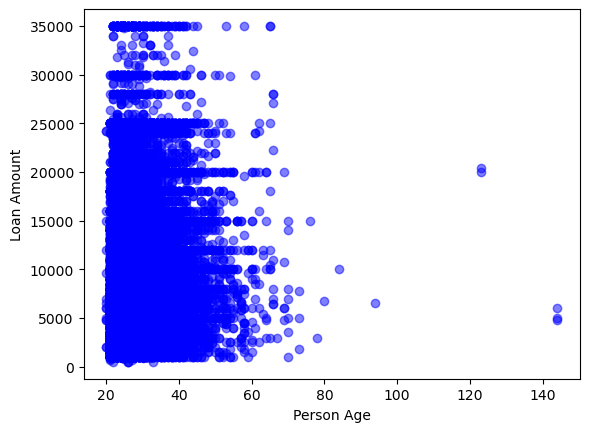

In [41]:
# Create the scatter plot for age and amount
plt.scatter(cr_loan['person_age'], cr_loan['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

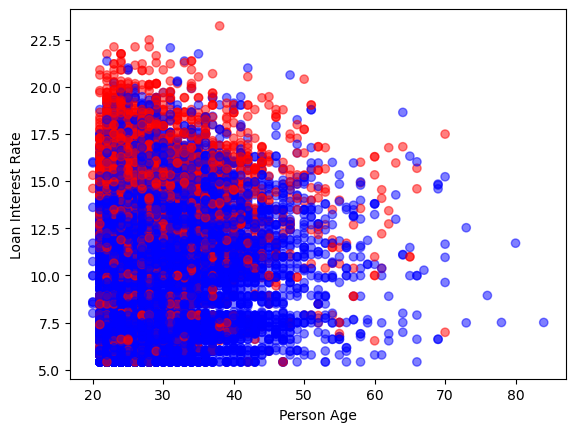

In [42]:
import matplotlib 
# Use Pandas to drop the record from the data frame and create a new one
cr_loan_new = cr_loan_new.drop(cr_loan_new[cr_loan_new['person_age'] > 100].index)

# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(cr_loan_new['person_age'], cr_loan_new['loan_int_rate'],
            c = cr_loan_new['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors), # custom colormap that maps specific loan statuses to defined colors for visualization.
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

In [43]:
cr_loan = cr_loan_new.copy()

### Missing data

__Replacing missing credit data__

check for missing data in the person_emp_length column and replace any missing values with the median.



Finding missing data

In [47]:
# Print a null value column array
print(cr_loan.columns[cr_loan.isnull().any()])
# Print the top five rows with nulls for employment length
cr_loan[cr_loan['person_emp_length'].isnull()].head()

Index(['person_emp_length', 'loan_int_rate'], dtype='object')


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_category
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4,low
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2,medium
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3,0
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2,medium
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3,high


Replacing missing data

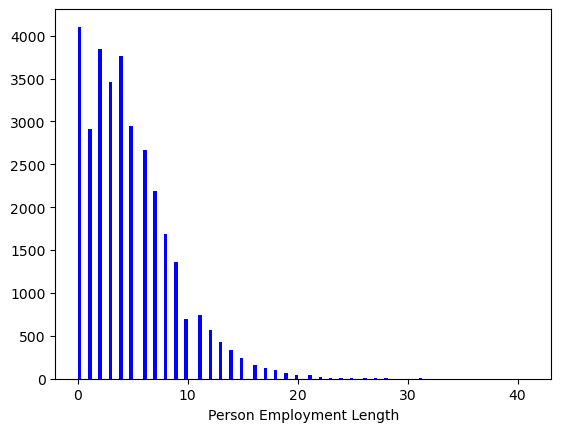

In [49]:
# Impute the null values with the median value for all employment lengths
cr_loan['person_emp_length'].fillna((cr_loan['person_emp_length'].median()), inplace=True)

# Create a histogram of employment length
n, bins, patches = plt.hist(cr_loan['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

__Removing missing data__

Similar to having missing data within loan_status, having missing data within loan_int_rate will make predictions difficult.

In [51]:
cr_loan.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3115
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
loan_category                    0
dtype: int64

In [52]:
# Store the array on indices
indices = cr_loan[cr_loan['loan_int_rate'].isnull()].index

# Save the new data without missing data
cr_loan_clean = cr_loan.drop(indices)
indices

Index([   39,    50,    57,    59,    62,    70,    71,    84,    85,    87,
       ...
       32505, 32510, 32532, 32535, 32546, 32547, 32552, 32553, 32569, 32570],
      dtype='int64', length=3115)

In [53]:
cr_loan_clean.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_category                 0
dtype: int64

In [54]:
pd.crosstab(cr_loan_clean['loan_category'], cr_loan_clean['loan_status'])

loan_status,0,1
loan_category,,
high,1445,1995
low,3444,294
medium,18107,4174


## Credit Risk Model using ML

#### Logistic regression 

In [57]:
from sklearn.linear_model import LogisticRegression

training a logistic regression model with just loan_int_rate

In [59]:
import numpy as np
# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate']]
y = cr_loan_clean[['loan_status']]

# Create and fit a logistic regression model
clf_logistic_single = LogisticRegression()
clf_logistic_single.fit(X, np.ravel(y)) # ravel: converts multi-dimensional arrays into a one-dimensional array

# Print the parameters of the model
print(clf_logistic_single.get_params())

# Print the intercept of the model
print(clf_logistic_single.intercept_)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[-4.45785901]


Multivariate logistic regression

In [61]:
# Create X data for the model
X_multi = cr_loan_clean[['loan_int_rate','person_emp_length']]

# Create a set of y data for training
y = cr_loan_clean[['loan_status']]

# Create and train a new logistic regression
clf_logistic_multi = LogisticRegression(solver='lbfgs').fit(X_multi, np.ravel(y))

# Print the intercept of the model
print(clf_logistic_multi.intercept_)

[-4.21645549]


The new clf_logistic_multi model has an .intercept_ value closer to zero. This means the log odds of a non-default is approaching zero.

Creating training and test sets

In [64]:
from sklearn.model_selection import train_test_split

# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate','person_emp_length','person_income']]
y = cr_loan_clean[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)

[[ 1.28517496e-09 -2.27622202e-09 -2.17211991e-05]]


#### Predicting the probability of default

One-hot encoding credit data

In [67]:
# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
cr_loan_prep = pd.concat([cred_num,cred_str_onehot], axis=1)

# Print the columns in the new data set
print(cr_loan_prep.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y',
       'loan_category_high', 'loan_category_low', 'loan_category_medium'],
      dtype='object')


data processing is complete and it's time to begin creating predictions for probability of default. 

In [69]:
# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            1      0.273397
1            1      0.211796
2            0      0.206394
3            0      0.185875
4            1      0.218026
